In case the time in your virtual machine is not 'up-to-date' install on the command line the package `ntpdate`.

```bash
sudo apt-get install -y ntpdate
```

and update the time in the virtual machine via `sudo ntpdate -u ntp.ubuntu.com`.

Alterantively, follow the advise on http://stackoverflow.com/questions/19490652/how-to-sync-time-on-host-wake-up-within-virtualbox

In [673]:
%%bash

sudo ntpdate -u ntp.ubuntu.com

 8 Mar 09:05:04 ntpdate[18680]: step time server 91.189.89.198 offset 782.827785 sec


# Datetime in Python

This intro to handling *dates* and *times* in Python is based on the documentation of the standard library's `datetime` module https://docs.python.org/3.4/library/datetime.html.

The datetime module supplies classes for manipulating *dates* and *times* in both simple and complex ways. While date and time arithmetic is supported, the focus of the implementation is on efficient attribute extraction for output formatting and manipulation.

## Date Objects

A date object represents a date (year, month and day) in an idealized calendar, the current Gregorian calendar indefinitely extended in both directions. January 1 of year 1 is called day number 1, January 2 of year 1 is called day number 2, and so on. This matches the definition of the "proleptic Gregorian" calendar in Dershowitz and Reingold’s book Calendrical Calculations, where it is the base calendar for all computations. See the book for algorithms for converting between proleptic Gregorian ordinals and many other calendar systems. Alternatively, you can have a look at the paper describing what is extended in the book:
http://www.cs.tau.ac.il/~nachumd/papers/cc-paper.pdf

In [674]:
from datetime import date


today = date.today()
today

datetime.date(2017, 3, 8)

In [675]:
today = date(today.year, 3, 8)
today

datetime.date(2017, 3, 8)

In [680]:
next_lecture = date(today.year, 3, 10)
time_to_next_lecture = abs(next_lecture - today)
time_to_next_lecture.days

2

In [682]:
today.strftime("%d/%m/%Y")

'08/03/2017'

In [683]:
today.strftime("%A %d. %B %Y")

'Wednesday 08. March 2017'

## Time Objects

A time object represents a (local) time of day, independent of any particular day. In our coure I will not consider times with respect to different time zones. In case you need to add information about which time zone a `time` refers, please read https://docs.python.org/3.4/library/datetime.html#tzinfo-objects.

In [684]:
from datetime import datetime, date, time
 
t = time(12, 10, 30)
t.isoformat()

'12:10:30'

In [685]:
print(t.strftime('%H:%M:%S'))

print('The {} is {:%H:%M}.'.format("time", t))

12:10:30
The time is 12:10.


## Datetime Objects

In [686]:
from datetime import datetime, date, time

d = date.today()
t = time(12, 30)
datetime.combine(d, t)

datetime.datetime(2017, 3, 8, 12, 30)

In [688]:
now = datetime.now()
now

datetime.datetime(2017, 3, 8, 9, 14, 21, 872081)

In [689]:
datetime.utcnow()

datetime.datetime(2017, 3, 8, 9, 14, 44, 814604)

In [692]:
ic = now.isocalendar()
week_number = ic[1]
week_number

10

In [693]:
now.strftime("%A, %d. %B %Y %I:%M%p")

'Wednesday, 08. March 2017 09:14AM'

In [ ]:
'The {1} is {0:%d}, the {2} is {0:%B}, the {3} is {0:%I:%M%p}.'.format(now, "day", "month", "time")

In [694]:
d = datetime.strptime('10 Jun 2010', '%d %b %Y')
print(d)
d.strftime('%d-%m-%Y week: %U')

2010-06-10 00:00:00


'10-06-2010 week: 23'

## Timedeltas

A `timedelta` object represents a duration, the difference between two dates or times.

In [696]:
from datetime import timedelta

d = timedelta(microseconds=5)
(d.days, d.seconds, d.microseconds)

(0, 0, 5)

In [ ]:
timedelta(hours=-5)

### Operations with `timedelta`s

In [697]:
year_as_delta = timedelta(days=365)
another_year_delta = timedelta(weeks=40, days=84, hours=23, minutes=50, seconds=600)  # adds up to 365 days

last_year = datetime.now() - year_as_delta
next_year = datetime.now() - year_as_delta + (
    2 *another_year_delta)
print(last_year)
print(next_year)

two_year_delta = next_year - last_year
print('The two year difference is equivalent to {} days and {} seconds'.format(
    two_year_delta.days, two_year_delta.total_seconds()))


2016-03-08 09:20:52.985342
2018-03-08 09:20:52.985388
The two year difference is equivalent to 730 days and 63072000.000046 seconds


## Converting Strings to Times and Vice Versa

In [ ]:
from datetime import datetime

datetime.now().isoformat()

In [ ]:
dt = datetime.strptime('21/11/06 16:30', '%d/%m/%y %H:%M')
dt

In [ ]:
dt.strftime('%y-%m-%d %H:%M')

### Parsing Arbitrary Dates from Strings

The `dateutil.parser` module offers a generic date/time string parser which is able to parse most known formats to represent a date and/or time.

The module attempts to be forgiving with regards to unlikely input formats, returning a datetime object even for dates which are ambiguous.

In [699]:
import dateutil.parser

dateutil.parser.parse('21/11-06 16:30')

datetime.datetime(2006, 11, 21, 16, 30)

# Pandas for Time Series and Data Frames

Pandas is -similar to NumPy- another library offering high-level data structures, which enable fast data analyzis. For us, the most important are probably the types `Series` and `DataFrame`, both of which are introduced in the following.  

This tutorial is based on the intro to Pandas: http://pandas.pydata.org/pandas-docs/stable/10min.html


In [10]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

As we will refer to Panda's classes and functions often in code, we usually import the module as `pd`.

In [701]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## `Series`

A `Series` is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index.

http://pandas.pydata.org/pandas-docs/stable/dsintro.html#series

You can creating a Series by passing a list of values, letting Pandas create a default integer index.

In [706]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

For the following example introducing `Series` we will collect some open data from the World Bank, see http://data.worldbank.org/?locations=DK-UY. The this dataset includes a plethora of interesting data. However, for this example we will focus on the *CO2 emissions (metric tons per capita)*.

First, we have to download the data. We do this by writing the response to a request to the World Bank API into a file. As denoted in the response header, we receive a ZIP file.

In [707]:
import requests


url = 'http://api.worldbank.org/v2/en/country/DNK;URY'

response = requests.get(url, params={'downloadformat': 'csv'})
print(response.headers)

fname = response.headers['Content-Disposition'].split('=')[1]

if response.ok:  # status_code == 200:
    with open(fname, 'wb') as f:
        f.write(response.content)   

print('Downloaded {}'.format(fname))

{'Set-Cookie': 'TS01fa65e4=01359ee976bc8abe2a087074887cf79d179c33d5c1cc0cf43f47d78d4f182548d5e5218394; Path=/', 'Server': 'Apigee Router', 'Content-Length': '552537', 'Content-Type': 'application/zip', 'X-Powered-By': 'ASP.NET', 'Content-Disposition': 'attachment; filename=API_Download_DS2_en_csv_v2_148410.zip', 'Date': 'Wed, 08 Mar 2017 09:30:33 GMT', 'Connection': 'keep-alive'}
Downloaded API_Download_DS2_en_csv_v2_148410.zip


In [708]:
%%bash

ls -ltrh | tail

-rw-r--r-- 1 vagrant vagrant  836K Mar  7 14:43 Metadata_Indicator_API_Download_DS2_en_csv_v2_148410.csv
-rw-r--r-- 1 vagrant vagrant   265 Mar  7 14:43 Metadata_Country_API_Download_DS2_en_csv_v2_148410.csv
-rw-r--r-- 1 vagrant vagrant  1.5M Mar  7 14:43 API_Download_DS2_en_csv_v2_148410.csv
-rw-r--r-- 1 vagrant vagrant  1.7K Mar  7 20:25 Metadata_Indicator_API_MS.MIL.XPND.CN_DS2_en_csv_v2.csv
-rw-r--r-- 1 vagrant vagrant   50K Mar  7 20:25 Metadata_Country_API_MS.MIL.XPND.CN_DS2_en_csv_v2.csv
-rw-r--r-- 1 vagrant vagrant  106K Mar  7 20:25 API_MS.MIL.XPND.CN_DS2_en_csv_v2.csv
-rw-r--r-- 1 vagrant vagrant  291K Mar  8 07:29 PageRank.ipynb
-rw-r--r-- 1 vagrant vagrant  9.1K Mar  8 07:40 Links to student projects.ipynb
-rw-r--r-- 1 vagrant vagrant  540K Mar  8 09:30 API_Download_DS2_en_csv_v2_148410.zip
-rw-r--r-- 1 vagrant vagrant   37K Mar  8 09:30 Intro to Pandas.ipynb


You can resort to the standard libraries `zipfile` module to uncompress the downloaded file.

In [709]:
import zipfile


zipfile.ZipFile(fname, 'r').extractall('.')

In [710]:
%%bash

ls -ltrh | tail

-rw-r--r-- 1 vagrant vagrant  1.7K Mar  7 20:25 Metadata_Indicator_API_MS.MIL.XPND.CN_DS2_en_csv_v2.csv
-rw-r--r-- 1 vagrant vagrant   50K Mar  7 20:25 Metadata_Country_API_MS.MIL.XPND.CN_DS2_en_csv_v2.csv
-rw-r--r-- 1 vagrant vagrant  106K Mar  7 20:25 API_MS.MIL.XPND.CN_DS2_en_csv_v2.csv
-rw-r--r-- 1 vagrant vagrant  291K Mar  8 07:29 PageRank.ipynb
-rw-r--r-- 1 vagrant vagrant  9.1K Mar  8 07:40 Links to student projects.ipynb
-rw-r--r-- 1 vagrant vagrant  540K Mar  8 09:30 API_Download_DS2_en_csv_v2_148410.zip
-rw-r--r-- 1 vagrant vagrant   37K Mar  8 09:30 Intro to Pandas.ipynb
-rw-r--r-- 1 vagrant vagrant  836K Mar  8 09:32 Metadata_Indicator_API_Download_DS2_en_csv_v2_148410.csv
-rw-r--r-- 1 vagrant vagrant   265 Mar  8 09:32 Metadata_Country_API_Download_DS2_en_csv_v2_148410.csv
-rw-r--r-- 1 vagrant vagrant  1.5M Mar  8 09:32 API_Download_DS2_en_csv_v2_148410.csv


Additionally, you can make use of the `glob` module to glob for certain file patterns. We will store the filename of the CSV file we are interested in, in a variable called `local_file`.

In [711]:
from glob import glob

local_file = glob('./API_Download*.csv')[0]

## A small detour...

### Collecting information on the CLI

To see the header of the file that is of our interest, we can use the `head` command.

In [712]:
%%bash

head ./API_Download_DS2_en_csv_v2_148410.csv

﻿"Data Source","World Development Indicators",

"Last Updated Date","2017-02-01",

"Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016",
"Denmark","DNK","Mobile account, income, richest 60% (% ages 15+) [w2]","WP15163_4.9","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","",
"Denmark","DNK","Mobile account, income, poorest 40% (% ages 15+) [w2]","WP15163_4.8","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","

We can see that the actual CSV header is on line five. To extract only the header row, we can use the stream editor *sed*, see `man sed`. The argument `'5!d'` tells `sed`, that we are only interested in the fifth line.

In [714]:
%%bash

sed '5!d' API_Download_DS2_en_csv_v2_148410.csv

"Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016",


To get the two lines -one for Denmark and one for Uruguay repectively- holding the CO2 emission in tons, we can use the grep command, see `man grep`.

In [715]:
%%bash

grep 'CO2 emissions (metric tons per capita)' API_Download_DS2_en_csv_v2_148410.csv

"Denmark","DNK","CO2 emissions (metric tons per capita)","EN.ATM.CO2E.PC","6.50268309283578","6.88126015490644","7.9451073610821","8.68983130048716","9.14639293937068","9.31657600359066","10.4490116586529","10.1493005475918","10.9613147942099","12.1429748602781","12.5996564651087","11.4972271507917","11.9488346011977","11.801611792919","10.9167686263068","11.0237664584528","11.8549028939028","12.1545851471744","11.9739262277225","12.3121966244144","11.7840138262008","10.1119423880012","10.491964531704","9.81084223305764","9.9501332161102","11.7474430895414","11.5032965311821","11.3793050315349","10.7432506302739","9.5050900188092","9.77069869920651","11.6933114849006","10.5045544990979","10.9982550300388","11.7169488953513","10.9245408267288","13.7146519315518","11.6476885201886","11.2273041516574","10.3626636406223","9.61317555419716","9.87509234839328","9.68193192955788","10.3882734936947","9.36270101912787","8.69007693057132","10.1129141598949","9.20201511030611","8.54335109757298",

### Executing OS Commands from Python


With the help of the `subprocess` module allows us to execute shell commands and to read what the process was writing to standard out and standard error.


In [717]:
import subprocess


cmd = 'sed 5!d {}'.format(local_file).split()
out, err = subprocess.Popen(cmd, stdout=subprocess.PIPE, 
                            stderr=subprocess.STDOUT).communicate()
# Since we are getting the output as a byte literal, we have to decode it into string
header_cols = out.splitlines()[0].decode('UTF-8').split(',')
header_cols = [h.replace('"', '') for h in header_cols]
header_cols

['Country Name',
 'Country Code',
 'Indicator Name',
 'Indicator Code',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '']

Now, let's get in a similar way the line of the CSV file containing the time series corresponding to Danmark's and Uruguay's CO2 emissions per person.

In [719]:
import subprocess


cmd = ['grep', 'CO2 emissions (metric tons per capita)', local_file]
out, err = subprocess.Popen(cmd, stdout=subprocess.PIPE, 
                            stderr=subprocess.STDOUT).communicate()
lines = out.decode('UTF-8').splitlines()
lines = [l.split(',') for l in lines]
lines = [[c.replace('"', '') for c in l] for l in lines]
lines

[['Denmark',
  'DNK',
  'CO2 emissions (metric tons per capita)',
  'EN.ATM.CO2E.PC',
  '6.50268309283578',
  '6.88126015490644',
  '7.9451073610821',
  '8.68983130048716',
  '9.14639293937068',
  '9.31657600359066',
  '10.4490116586529',
  '10.1493005475918',
  '10.9613147942099',
  '12.1429748602781',
  '12.5996564651087',
  '11.4972271507917',
  '11.9488346011977',
  '11.801611792919',
  '10.9167686263068',
  '11.0237664584528',
  '11.8549028939028',
  '12.1545851471744',
  '11.9739262277225',
  '12.3121966244144',
  '11.7840138262008',
  '10.1119423880012',
  '10.491964531704',
  '9.81084223305764',
  '9.9501332161102',
  '11.7474430895414',
  '11.5032965311821',
  '11.3793050315349',
  '10.7432506302739',
  '9.5050900188092',
  '9.77069869920651',
  '11.6933114849006',
  '10.5045544990979',
  '10.9982550300388',
  '11.7169488953513',
  '10.9245408267288',
  '13.7146519315518',
  '11.6476885201886',
  '11.2273041516574',
  '10.3626636406223',
  '9.61317555419716',
  '9.875092348393

As in Pandas `Series` are one-dimensional labeled arrays, we are now ready to go to create two time series of CO2 emissions for Danmark and Uruguay repectively.
 

In [720]:
print(header_cols)
print(lines)

['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '']
[['Denmark', 'DNK', 'CO2 emissions (metric tons per capita)', 'EN.ATM.CO2E.PC', '6.50268309283578', '6.88126015490644', '7.9451073610821', '8.68983130048716', '9.14639293937068', '9.31657600359066', '10.4490116586529', '10.1493005475918', '10.9613147942099', '12.1429748602781', '12.5996564651087', '11.4972271507917', '11.9488346011977', '11.801611792919', '10.9167686263068', '11.0237664584528', '11.8549028939028', '12.1545851471744', '11.9739262277225', '12.312196624

Since our data and the corresponding indexes are still all strings we have to convert them to floats and integers repectively. We do so using two different mechanisms. Once, creation of typed NumPy arrays and on the other hand via a Pandas method `convert_objects`, which converts strings to numerical values of a suitable type.

In [725]:
header_cols[4:-1]
lines[0][4:-1]

ts_dk = pd.Series(lines[0][4:-1], index=np.asarray(header_cols[4:-1], dtype=int))
ts_dk
ts_dk = ts_dk.convert_objects(convert_numeric=True)
ts_dk.loc[1960]

6.5026830928357802

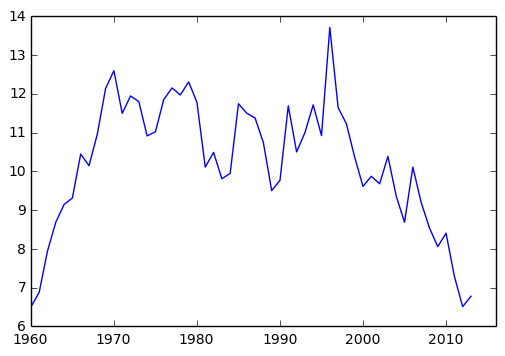

In [726]:
ts_dk.plot()

Now we create a time series for the corresponding Uruguaian time series.

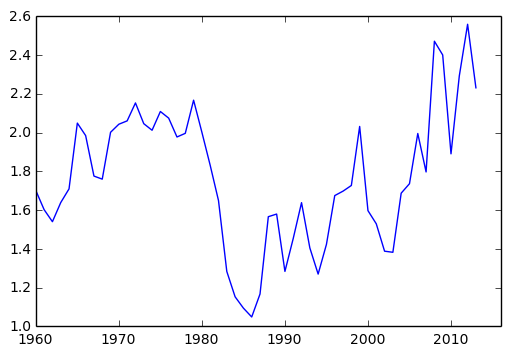

In [727]:
ts_ur = pd.Series(lines[1][4:-1], index=np.asarray(header_cols[4:-1], dtype=int))
ts_ur = ts_ur.convert_objects(convert_numeric=True)
ts_ur.plot()

# `DataFrame`

Since `Series` are one-dimensional arrays, we have to create a `DataFrame` if we wanted to combine our two previous `Series` objects `ts_dk` and `ts_ur`.Since `Series` are one-dimensional arrays, we have to create a `DataFrame` if we wanted to combine our two previous `Series` objects `ts_dk` and `ts_ur`. 

A `DataFrame` is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects.

In the following we concatenate two `Series`to form a `DataFrame`.

<class 'pandas.core.frame.DataFrame'>


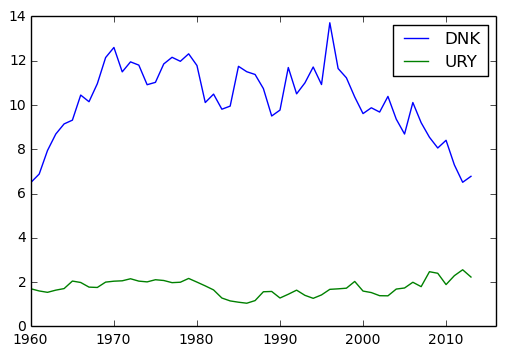

In [731]:
ts = pd.concat([ts_dk, ts_ur], axis=1, keys=['DNK', 'URY'])
ts
print(type(ts))
ts.plot()

More information on `DataFrame`s can be found here:
http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe

Similar to, we can create `DataFrame`s by giving the data for the values and indexes explicitely.

In [732]:
dates = pd.date_range('20170308', periods=6)
df = pd.DataFrame(np.random.randn(6,4), index=dates, 
                  columns=list('ABCD'))
df

,A,B,C,D
2017-03-08,-1.602504,-0.602639,-2.727856,-0.170812
2017-03-09,-0.870147,1.766339,-0.911725,0.612365
2017-03-10,-0.043533,-0.458014,1.934092,0.265962
2017-03-11,0.143331,0.935737,0.377930,1.576182
2017-03-12,1.600826,1.130078,0.045489,-0.009738
2017-03-13,-1.275218,1.157046,0.569157,-0.835629


But since we do not want to work on random example data. We will have a look on the military expenditures of some countries in the world. We will use this data to exemplify usage of Pandas' `DataFrame` methods.

Again, we will receive the data from the World Bank.
http://data.worldbank.org/indicator/MS.MIL.XPND.CN?locations=DK-CN-US-RU

In [733]:
import requests


url = 'http://api.worldbank.org/v2/en/indicator/MS.MIL.XPND.CN'

response = requests.get(url, params={'downloadformat': 'csv'})
fname = response.headers['Content-Disposition'].split('=')[1]

if response.ok:  # status_code == 200:
    with open(fname, 'wb') as f:
        f.write(response.content)   

print('Downloaded {}'.format(fname))
        

Downloaded API_MS.MIL.XPND.CN_DS2_en_csv_v2.zip


In [734]:
import os
import zipfile


zipfile.ZipFile(fname, 'r').extractall('.')
os.remove(fname)

In [735]:
ls -ltr | tail

-rw-r--r-- 1 vagrant vagrant    297287 Mar  8 07:29 PageRank.ipynb
-rw-r--r-- 1 vagrant vagrant      9233 Mar  8 07:40 Links to student projects.ipynb
-rw-r--r-- 1 vagrant vagrant    552537 Mar  8 09:30 API_Download_DS2_en_csv_v2_148410.zip
-rw-r--r-- 1 vagrant vagrant    855820 Mar  8 09:32 Metadata_Indicator_API_Download_DS2_en_csv_v2_148410.csv
-rw-r--r-- 1 vagrant vagrant       265 Mar  8 09:32 Metadata_Country_API_Download_DS2_en_csv_v2_148410.csv
-rw-r--r-- 1 vagrant vagrant   1512578 Mar  8 09:32 API_Download_DS2_en_csv_v2_148410.csv
-rw-r--r-- 1 vagrant vagrant      1648 Mar  8 09:58 Metadata_Indicator_API_MS.MIL.XPND.CN_DS2_en_csv_v2.csv
-rw-r--r-- 1 vagrant vagrant     50374 Mar  8 09:58 Metadata_Country_API_MS.MIL.XPND.CN_DS2_en_csv_v2.csv
-rw-r--r-- 1 vagrant vagrant    108161 Mar  8 09:58 API_MS.MIL.XPND.CN_DS2_en_csv_v2.csv
-rw-r--r-- 1 vagrant vagrant    140369 Mar  8 09:58 Intro to Pandas.ipynb


In [2]:
from glob import glob

milit_files = glob('./*MIL*.csv')
expenditure_csv = milit_files[0]

In [737]:
%%bash

head ./API_MS.MIL.XPND.CN_DS2_en_csv_v2.csv

﻿"Data Source","World Development Indicators",

"Last Updated Date","2017-02-01",

"Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016",
"Aruba","ABW","Military expenditure (current LCU)","MS.MIL.XPND.CN","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","",
"Andorra","AND","Military expenditure (current LCU)","MS.MIL.XPND.CN","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","",""

Now, we use Pandas' `read_csv` function to read the downloaded CSV file directly. Note that we have to skip the first four rows as they do not contain data we are interested in, see keyword argument `skiprows=4`.

Reading the CSV file like this returns a `DataFrame` directly.

In [3]:
import pandas as pd


expenditures = pd.read_csv(expenditure_csv, skiprows=4)
expenditures

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Aruba,ABW,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.208667e+10,1.267533e+10,1.384967e+10,1.523050e+10,1.214900e+10,1.202767e+10,1.535600e+10,1.219917e+10,NaN,NaN
3,Angola,AGO,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.373750e+11,2.626710e+11,3.217430e+11,3.418750e+11,3.956800e+11,5.878690e+11,6.730000e+11,4.332150e+11,NaN,NaN
4,Albania,ALB,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.145000e+10,1.735600e+10,1.932100e+10,1.987700e+10,1.982000e+10,1.902200e+10,1.878800e+10,1.667100e+10,NaN,NaN
5,Arab World,ARB,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,United Arab Emirates,ARE,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.249700e+10,5.081400e+10,6.428600e+10,7.044500e+10,6.986600e+10,8.652800e+10,8.356800e+10,NaN,NaN,NaN
7,Argentina,ARG,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.769000e+09,1.106300e+10,1.354100e+10,1.665400e+10,2.070300e+10,2.805000e+10,4.020900e+10,5.038360e+10,NaN,NaN
8,Armenia,ARM,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.211620e+11,1.306000e+11,1.476000e+11,1.456000e+11,1.529000e+11,1.821000e+11,1.904110e+11,2.138110e+11,NaN,NaN
9,American Samoa,ASM,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Viewing Data

In [741]:
expenditures.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Aruba,ABW,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.208667e+10,1.267533e+10,1.384967e+10,1.523050e+10,1.214900e+10,1.202767e+10,1.535600e+10,1.219917e+10,NaN,NaN
3,Angola,AGO,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.373750e+11,2.626710e+11,3.217430e+11,3.418750e+11,3.956800e+11,5.878690e+11,6.730000e+11,4.332150e+11,NaN,NaN
4,Albania,ALB,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.145000e+10,1.735600e+10,1.932100e+10,1.987700e+10,1.982000e+10,1.902200e+10,1.878800e+10,1.667100e+10,NaN,NaN


In [742]:
expenditures.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
259,"Yemen, Rep.",YEM,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.390000e+11,2.882000e+11,3.180000e+11,3.447000e+11,3.470000e+11,3.543000e+11,3.685000e+11,NaN,NaN,NaN
260,South Africa,ZAF,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.714575e+10,3.044325e+10,3.066250e+10,3.335875e+10,3.685940e+10,3.976155e+10,4.225475e+10,4.414880e+10,NaN,NaN
261,"Congo, Dem. Rep.",COD,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.948600e+10,9.910000e+10,1.664000e+11,2.195630e+11,3.058130e+11,3.444400e+11,3.157100e+11,4.549150e+11,NaN,NaN
262,Zambia,ZMB,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.041500e+09,1.115000e+09,1.344100e+09,1.502500e+09,1.782500e+09,2.057700e+09,2.729418e+09,3.215100e+09,NaN,NaN
263,Zimbabwe,ZWE,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9.829300e+07,1.984380e+08,3.182720e+08,3.567000e+08,3.681000e+08,3.766770e+08,NaN,NaN


In [743]:
expenditures.index

RangeIndex(start=0, stop=264, step=1)

In [744]:
expenditures.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', 'Unnamed: 61'],
      dtype='object')

In [745]:
expenditures.values

array([['Aruba', 'ABW', 'Military expenditure (current LCU)', ..., nan,
        nan, nan],
       ['Andorra', 'AND', 'Military expenditure (current LCU)', ..., nan,
        nan, nan],
       ['Afghanistan', 'AFG', 'Military expenditure (current LCU)', ...,
        12199166666.6667, nan, nan],
       ..., 
       ['Congo, Dem. Rep.', 'COD', 'Military expenditure (current LCU)',
        ..., 454915000000.0, nan, nan],
       ['Zambia', 'ZMB', 'Military expenditure (current LCU)', ...,
        3215100000.0, nan, nan],
       ['Zimbabwe', 'ZWE', 'Military expenditure (current LCU)', ...,
        376677000.0, nan, nan]], dtype=object)

## Selection of Data in a `DataFrame`

### Selection by Column Name


In [ ]:
expenditures['Country Name']

### Selection by Indexes

In the following we index the third row directly.

In [ ]:
expenditures.iloc[3]

In [ ]:
expenditures.loc[3]

In [ ]:
expenditures.iloc[3:5]

In [746]:
expenditures.iloc[3:5, 4:-1]

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.559000e+11,2.373750e+11,2.626710e+11,3.217430e+11,3.418750e+11,3.956800e+11,5.878690e+11,6.730000e+11,4.332150e+11,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.761900e+10,2.145000e+10,1.735600e+10,1.932100e+10,1.987700e+10,1.982000e+10,1.902200e+10,1.878800e+10,1.667100e+10,NaN


## Boolean Indexing

Similar to NumPy, you can use boolean arrays for indexing. That is, you can use boolean expressions directly for indexing.

In the following we assign `expenditures` to `df`as the latter is shorter.

In [6]:
df = expenditures

df[df['Country Name'] == 'Denmark']

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
55,Denmark,DNK,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.441000e+10,2.325200e+10,2.532800e+10,2.425900e+10,2.561700e+10,2.368200e+10,2.276900e+10,2.329600e+10,NaN,NaN


Using the `isin()` method for filtering:

In [7]:
df[df['Country Name'].isin(['United States', 'China', 'Denmark', 'Russian Federation'])]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
38,China,CHN,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.004500e+11,7.216284e+11,7.833243e+11,8.914702e+11,9.938496e+11,1.101905e+12,1.226545e+12,1.337435e+12,NaN,NaN
55,Denmark,DNK,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.441000e+10,2.325200e+10,2.532800e+10,2.425900e+10,2.561700e+10,2.368200e+10,2.276900e+10,2.329600e+10,NaN,NaN
199,Russian Federation,RUS,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.396330e+12,1.635650e+12,1.783210e+12,2.063740e+12,2.512500e+12,2.812900e+12,3.250500e+12,4.047400e+12,NaN,NaN
248,United States,USA,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.211310e+11,6.685670e+11,6.981800e+11,7.113380e+11,6.847800e+11,6.397040e+11,6.099140e+11,5.960240e+11,NaN,NaN


Here, we create a `DataFrame` of all country codes for the four countries, which we want to study further in the following.

In [8]:
c_code_df = df[df['Country Name'].isin(['United States', 'China', 
                                        'Denmark', 'Russian Federation'])]['Country Code']
c_code_df

38     CHN
55     DNK
199    RUS
248    USA
Name: Country Code, dtype: object

We cannot plot the time series of military expenditures directly in a meaningful way as we would like to have the years on the y-axis but in the selection of our `DataFrame`, the year numbers are column names. Consequently, we have to transpose our `DataFrame`, see `T` function.

Note, that the expenditures are given in `LUC` in the World Bank data set. That is, in currency of the corresponding country.

In [19]:
import matplotlib.pyplot as plt
ts_df = df.iloc[c_code_df.index, 31:-1].T
ts_df = ts_df.rename(columns=dict(c_code_df))
ts_df
plt.xticks(x, labels, rotation='vertical')
ts_df.plot()




NameError: name 'x' is not defined

Since this plot may be a bit misleading, we will 'normalize' all expeditures to Euro, so that they are better comparible.

In [758]:
import requests


# http://www.ecb.europa.eu/stats/policy_and_exchange_rates/euro_reference_exchange_rates/html/index.en.html#dev
response = requests.get('http://www.ecb.europa.eu/stats/eurofxref/eurofxref-daily.xml')
response.text

'<?xml version="1.0" encoding="UTF-8"?>\n<gesmes:Envelope xmlns:gesmes="http://www.gesmes.org/xml/2002-08-01" xmlns="http://www.ecb.int/vocabulary/2002-08-01/eurofxref">\n\t<gesmes:subject>Reference rates</gesmes:subject>\n\t<gesmes:Sender>\n\t\t<gesmes:name>European Central Bank</gesmes:name>\n\t</gesmes:Sender>\n\t<Cube>\n\t\t<Cube time=\'2017-03-07\'>\n\t\t\t<Cube currency=\'USD\' rate=\'1.0576\'/>\n\t\t\t<Cube currency=\'JPY\' rate=\'120.61\'/>\n\t\t\t<Cube currency=\'BGN\' rate=\'1.9558\'/>\n\t\t\t<Cube currency=\'CZK\' rate=\'27.021\'/>\n\t\t\t<Cube currency=\'DKK\' rate=\'7.4340\'/>\n\t\t\t<Cube currency=\'GBP\' rate=\'0.86710\'/>\n\t\t\t<Cube currency=\'HUF\' rate=\'309.52\'/>\n\t\t\t<Cube currency=\'PLN\' rate=\'4.3075\'/>\n\t\t\t<Cube currency=\'RON\' rate=\'4.5384\'/>\n\t\t\t<Cube currency=\'SEK\' rate=\'9.5218\'/>\n\t\t\t<Cube currency=\'CHF\' rate=\'1.0730\'/>\n\t\t\t<Cube currency=\'NOK\' rate=\'8.9443\'/>\n\t\t\t<Cube currency=\'HRK\' rate=\'7.4090\'/>\n\t\t\t<Cube curre

In [759]:
from bs4 import BeautifulSoup


xml = BeautifulSoup(response.text)
rate_list = xml.cube.cube.findAll("cube") # [0]['rate']

currency = ['USD', 'DKK', 'RUB', 'CNY']
rate_dict = dict.fromkeys(currency)
for r in rate_list:
    if r['currency'] in currency:
        rate_dict[r['currency']] = float(r['rate'])
        print(r['rate'])
rate_dict

1.0576
7.4340
61.3560
7.2976


{'CNY': 7.2976, 'DKK': 7.434, 'RUB': 61.356, 'USD': 1.0576}

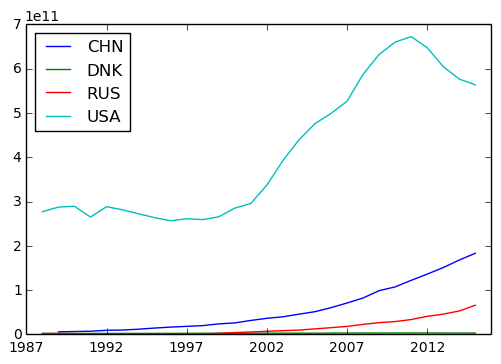

In [760]:
ts_df['DNK'] = ts_df['DNK'] / rate_dict['DKK']
ts_df['USA'] = ts_df['USA'] / rate_dict['USD']
ts_df['CHN'] = ts_df['CHN'] / rate_dict['CNY']
ts_df['RUS'] = ts_df['RUS'] / rate_dict['RUB']
ts_df.plot()

**OBS!!!** Be careful, the graph above is still not really well suited for comparison as currency exchange rates are not fix. However, the code above normalizes just relying on the most current exchange rate from the European Central Bank. See the exercise block in the bottom for how to fix that isuue!

In [761]:
ts_df['USA']

1987             NaN
1988    2.771303e+11
1989    2.875236e+11
1990    2.894951e+11
1991    2.650265e+11
1992    2.885221e+11
1993    2.814268e+11
1994    2.723705e+11
1995    2.636687e+11
1996    2.566348e+11
1997    2.612755e+11
1998    2.593400e+11
1999    2.656666e+11
2000    2.852657e+11
2001    2.957101e+11
2002    3.372920e+11
2003    3.926087e+11
2004    4.393684e+11
2005    4.759389e+11
2006    4.989221e+11
2007    5.266273e+11
2008    5.873024e+11
2009    6.321549e+11
2010    6.601551e+11
2011    6.725964e+11
2012    6.474849e+11
2013    6.048638e+11
2014    5.766963e+11
2015    5.635628e+11
2016             NaN
Name: USA, dtype: float64

In [762]:
5.312608e+11

531260800000.0

In [763]:
ts_df['USA'].loc['2015']

563562783661.11951

In [764]:
print(ts_df['USA'].loc['2015'])
print(' ' + str(ts_df['CHN'].loc['2015']))
ts_df['USA'].loc['2015'] / ts_df['CHN'].loc['2015']

563562783661.0
 183270565361.0


3.0750316208720281

In [765]:
from IPython.display import IFrame

news_url = 'https://www.washingtonpost.com/world/as-trump-pushes-for-bigger-us-defense-budget-china-slows-growth-rate-of-its-military-spending/2017/03/04/ace6105c-0094-11e7-a51a-e16b4bcc6644_story.html?utm_term=.85d4943cb972'
IFrame(news_url, width=700, height=400)

In [766]:
from IPython.display import IFrame

news_url = 'http://www.nbcnews.com/news/world/china-raise-defense-spending-trump-seeks-boost-u-s-s-n729051'
IFrame(news_url, width=700, height=400)

The data that we analyzed above together with the latest news and announcements sound at least concerning...

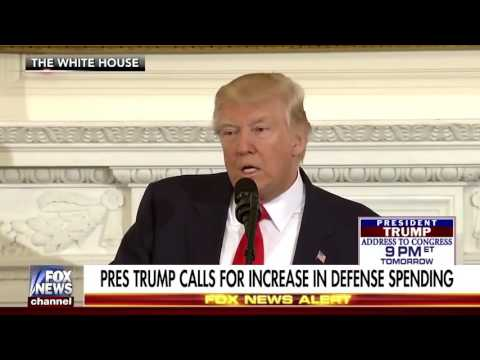

In [767]:
from datetime import timedelta
from IPython.display import YouTubeVideo


# news_url = 'http://edition.cnn.com/videos/politics/2017/02/27/donald-trump-addresses-governors-win-war.cnn'
# url = 'https://www.youtube.com/watch?v=0rwNo9CCW9k

start = int(timedelta(seconds=4).total_seconds())
YouTubeVideo('0rwNo9CCW9k', start=6, autoplay=1)

# Exercises for the Interested

  * Complete the comparison of military expenditures by converting all currencies to USD. Since we have yearly expenditures, use for example the yearly median for normalization. Likely, you will find an API to collect historical echange rates at Yahoo Finance.
  
  https://developer.yahoo.com/yql/console/?q=show%20tables&env=store://datatables.org/alltableswithkeys#h=select+*+from+yahoo.finance.historicaldata+where+symbol+%3D+%22RUB%3DX%22+and+startDate+%3D+%222010-01-01%22+and+endDate+%3D+%222011-01-01%22

## PS

In case you have to sort the data in your `DataFrames` see the methods `sort_index` and `sort_values`.


```python
df.sort_index(axis=1, ascending=True)
df.sort_values(by='Country Code')
```

In [ ]:
df.sort_index?

In [ ]:
df.sort_values?

### The Study Point Exercises!!!

Group *Jealous Secretary* presents their tasks on analyzing data on homocides in US: https://github.com/cph-al/pythonDataset/blob/master/README.md



## Hand-in Guidelines
How is your hand-in expected to look like?

  * You push the source code computing your solutions to a repository on Github.
  * You create a README.md file that presents your solution, each result per questions, and it explains how to run your code to reproduce your results.
  * Inform Helge when you are done. At latest at 24:00 the March 14th.
  * You prepare a short (max. 10 minutes) presentation for the next session, so that the other students know what you have done and how you tackled the problem. Furthermore, based on this presentation group *Jealous Secretary* will choose the winner of this round.